**Introduction**

The dataset we are analyzing contains information about various cryptocurrencies. The data includes the ‘Currency’ name, ‘Date’, ‘Open’, ‘High’, ‘Low’, ‘Close’ prices, ‘Volume’, and ‘Market Cap’. The ‘Currency’ column is of String type, ‘Date’ is of Date type, and the remaining columns are of float type. The unique currencies in the dataset are ‘tezos’, ‘binance-coin’, ‘eos’, ‘bitcoin’, ‘tether’, ‘xrp’, ‘bitcoin-cash’, ‘stellar’, ‘litecoin’, ‘ethereum’, ‘cardano’, and ‘bitcoin-sv’.
Objectives of the Exploratory Data Analysis (EDA) The main objectives of this EDA are to:

1.	Understand the structure and distribution of the data.
2.	Identify any patterns or trends in the cryptocurrency prices.
3.	Analyze the relationship between different variables such as ‘Open’, ‘High’, ‘Low’, ‘Close’ prices, ‘Volume’, and ‘Market Cap’.
4.	Provide insights that could potentially help in forecasting future prices

The data source is a comprehensive dataset of the historical prices of various cryptocurrencies. The context of this analysis is to understand the dynamics of cryptocurrency prices, which are known to be highly volatile. This analysis could be useful for anyone interested in cryptocurrency trading, investment, or research. It’s important to note that while historical price trends can provide useful insights, they are not a guarantee of future performance due to the inherent volatility and unpredictability of cryptocurrency markets




**Libraries used**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

1.	Pandas (import pandas as pd)
-	Pandas is a popular data manipulation library in Python.
-	It provides data structures like DataFrames and Series, which are powerful tools for working with structured data.
-	DataFrames are used to store and manipulate tabular data, similar to spreadsheets or SQL tables.
-	The `pd` alias is a common convention for referring to Pandas in code.

2.	NumPy (import numpy as np)
-	NumPy is a fundamental library for numerical and mathematical operations in Python.
-	It provides support for arrays and matrices, which are efficient data structures for numerical computations.
-	NumPy is often used in combination with Pandas for handling and processing numerical data.
-	The `np` alias is a common convention for referring to NumPy in code.

3.	Matplotlib (import matplotlib.pyplot as plt)

-	Matplotlib is a popular plotting library for creating static, interactive, and animated visualizations in Python.
-	The `pyplot` module from Matplotlib is commonly used for creating basic plots like line plots, scatter plots, bar plots, and more.
-	The `plt` alias is a common convention for referring to Matplotlib's `pyplot` module.

4.	Seaborn (import seaborn as sns)
-	Seaborn is a high-level data visualization library based on Matplotlib.
-	It provides a simpler and more aesthetically pleasing interface for creating statistical graphics.
-	Seaborn is particularly useful for creating complex visualizations with minimal code.
-	The `sns` alias is a common convention for referring to Seaborn in code.


**Data Description**

In [ ]:
#load the dataset in df
df=pd.read_csv('consolidated_coin_data.csv')

In [ ]:
#load first 5 row of dataset
df.head(5)

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


In [ ]:
#load last 5 row of dataset
df.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"
28943,bitcoin-sv,"Apr 28, 2013",4.30,4.40,4.18,4.35,0,"74,636,938"


In [ ]:
#All columns Data types
df.dtypes


Currency      object
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [ ]:
#shape of dataset (row,columns) in the datset
df.shape

(28944, 8)

In [ ]:
#The describe() function in pandas is used to generate descriptive statsitics
df.describe()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
count,28944,28944,28944,28944,28944,28944,28944,28944
unique,12,2412,12307,12057,12803,12294,16349,16058
top,tezos,"Feb 25, 2015",1.00,1.00,1.00,1.00,0,"451,600"
freq,2412,14,1725,1511,1367,1729,2916,394


**Data Cleaning**


In [ ]:
#Here from isnull() we found the null vaue on the dataset
df.isnull().sum()


Currency      0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

here we have  1 null value.in Volume and Market Cap.

droping the null values

In [ ]:
df=df.dropna()

In [ ]:
df.columns

Index(['Currency', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [ ]:
# Converting the Data type to the appropiate data type
import pandas as pd

# Assuming df is your DataFrame
df['Currency'] = df['Currency'].astype(str)  # Convert 'Currency' to string
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format

# Convert remaining columns to float
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '').astype(float)

In [ ]:
#The info() function in pandas provides a concise summary of a DataFrame, including
#information about the data types, non-null values, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


In [ ]:
# it's give us the unique value in each column
df.nunique()

Currency         12
Date           2412
Open          12307
High          12057
Low           12803
Close         12294
Volume        16349
Market Cap    16058
dtype: int64

**Distribution**

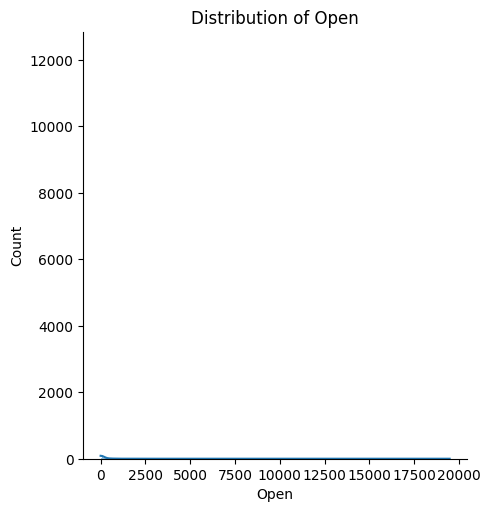

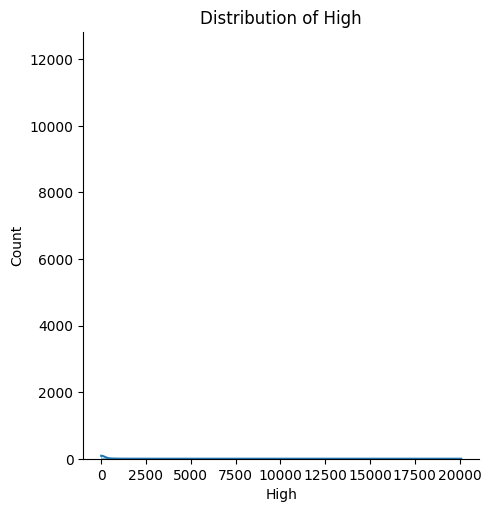

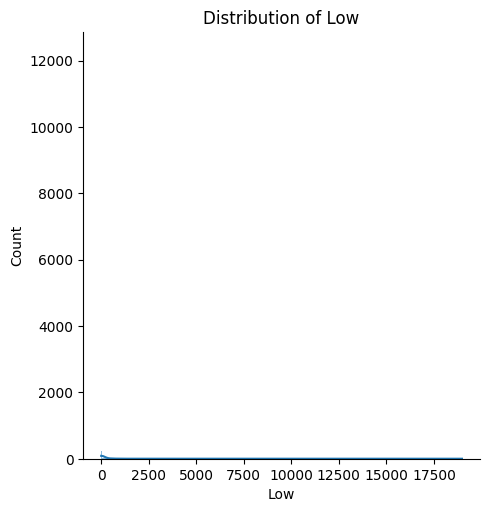

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



# Plotting the distribution of each numerical column
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']:
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Checking the type of distribution and transforming if needed
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

    # If skewness is > 0.5, the distribution is right-skewed
    # If skewness is < -0.5, the distribution is left-skewed
    # If skewness is between -0.5 and 0.5, the distribution is approximately symmetric
    # Applying log transformation if the distribution is skewed
    if abs(skewness) > 0.5:
        df[col] = df[col].apply(lambda x: np.log(x + 1))
        sns.displot(df[col], kde=True)
        plt.title(f'Distribution of {col} after log transformation')
        plt.show()



**Univariate Analysis**

Univariate analysis is a fundamental type of statistical data analysis that uses only one variable. The prefix "uni" means "one". <br>
The purpose of univariate analysis is to describe data. It summarizes data, finds patterns in the data, and understands the distribution of values for a <br> single variable. It doesn't deal with causes or relationships.

1,What is the summary statistics of each column? What are the mean, median, mode,standard deviation, minimum, maximum, and quartiles of each numerical column?

In [ ]:
import pandas as pd
# Assuming you already have your DataFrame 'df'
# Convert numerical columns to the appropriate data types
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
# Use the describe() method to calculate summary statistics
summary_stats = df[numerical_columns].describe()
# Calculate the mode separately
mode_values = df[numerical_columns].mode().iloc[0]
# Add the mode row to the summary statistics DataFrame
summary_stats.loc['mode'] = mode_values
# Print the summary statistics
print(summary_stats)

2,How is the distribution of each numerical column? Is it
normal, skewed, or bimodal? How can you visualize the distribution using histograms or boxplots?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you already have your DataFrame 'df'
# Convert numerical columns to the appropriate data types
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
# Create subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
row, col_idx = divmod(i, 3)
sns.histplot(df[col], ax=axes[row, col_idx], kde=True)
axes[row, col_idx].set_title(f'Histogram of {col}')
# Adjust layout
plt.tight_layout()
# Create subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
# Plot boxplots for each numerical column
for i, col in enumerate(numerical_columns):
row, col_idx = divmod(i, 3)
sns.boxplot(data=df, y=col, ax=axes[row, col_idx])
axes[row, col_idx].set_title(f'Boxplot of {col}')
# Adjust layout
plt.tight_layout()
# Show plots
plt.show()

3,How is the distribution of each categorical column? What are the unique values and their frequencies? How can you visualize the distribution using bar charts or pie charts?

In [ ]:
# Assuming you already have your DataFrame 'df'
# Check if 'Currency' is a categorical column
categorical_column = 'Currency'
# Count unique values and their frequencies
value_counts = df[categorical_column].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of {categorical_column}')
plt.axis('equal') # Equal aspect ratio ensures that the pie chart is circular.
# Show the pie chart
plt.show()

4,How does the data vary across different currencies? Which currencies have the highest or lowest values for each column?

In [ ]:
import pandas as pd
# Assuming your DataFrame is named 'df'
# Group the DataFrame by 'Currency'
grouped = df.groupby('Currency')
# Define the columns you want to analyze
columns_to_analyze = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
# Initialize dictionaries to store results
highest_values = {}
lowest_values = {}
# Calculate summary statistics for each column within each currency group
for col in columns_to_analyze:
highest_values[col] = grouped[col].max()
lowest_values[col] = grouped[col].min()
# Convert the dictionaries to DataFrames for easy visualization
highest_values_df = pd.DataFrame(highest_values)
lowest_values_df = pd.DataFrame(lowest_values)
# Display currencies with the highest and lowest values for each column
print("Currencies with the Highest Values:")
print(highest_values_df)
print("\nCurrencies with the Lowest Values:")
print(lowest_values_df)

5,What is the most traded currency?

In [ ]:
import pandas as pd
# Assuming your DataFrame is named 'df'
# Group the DataFrame by 'Currency' and calculate the total trading volume for each
currency_total_volume = df.groupby('Currency')['Volume'].sum().reset_index()
# Find the currency with the highest total trading volume
most_traded_currency = currency_total_volume.loc[currency_total_volume['Volume'].id
print("The most traded currency is:", most_traded_currency['Currency'])
print("Total trading volume:", most_traded_currency['Volume'])

6,What is the correlation between the price and the volume?

In [ ]:
import pandas as pd
# Assuming your DataFrame is named 'df'
# Calculate the correlation between 'Close' price and 'Volume'
correlation = df['Close'].corr(df['Volume'])
print("Correlation between Close Price and Volume:", correlation)

7,What is the correlation between the price and the market capitalization?

In [ ]:
import pandas as pd
# Assuming your DataFrame is named 'df'
# Calculate the correlation between 'Close' price and 'Market Cap'
correlation = df['Close'].corr(df['Market Cap'])
print("Correlation between Close Price and Market Capitalization:", correlation)

8,What is the overall trend in market capitalization over time? Can you identify any significant increases or decreases?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming df is your DataFrame
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Convert 'Market Cap' column to float (ignore errors, which will convert non-numer
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
# Group data by date and calculate total market capitalization for each date
market_cap_over_time = df.groupby('Date')['Market Cap'].sum()
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(market_cap_over_time.index, market_cap_over_time.values)
plt.xlabel('Date')
plt.ylabel('Total Market Capitalization')
plt.title('Trend in Total Market Capitalization Over Time')
plt.grid(True)
# Show the plot
plt.show()

9,Are there any outliers in the volume column? If so, which currencies have the highest and lowest outlier volumes?

In [ ]:
import pandas as pd
# Assuming df is your DataFrame with columns 'Currency' and 'Volume'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5 * IQR
# Identify outliers
outliers = df[(df['Volume'] < Q1 - outlier_threshold) | (df['Volume'] > Q3 + outlie
# Print currencies with the highest and lowest outlier volumes
highest_outliers = outliers.sort_values('Volume', ascending=False)
lowest_outliers = outliers.sort_values('Volume')
print("Currencies with the Highest Outlier Volumes:")
print(highest_outliers[['Currency', 'Volume']])
print("\nCurrencies with the Lowest Outlier Volumes:")
print(lowest_outliers[['Currency', 'Volume']])

10,How does the distribution of closing prices vary among different currencies? Can you identify any patterns or anomalies?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is your DataFrame
# Convert 'Close' column to float (if not already)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
# Group data by 'Currency'
grouped_data = df.groupby('Currency')
# Create a list of currencies for analysis
currencies_to_analyze = ['xrp', 'cardano', 'ethereum', 'litecoin', 'stellar',
'bitcoin-cash', 'tether', 'bitcoin', 'eos', 'binance-coin',
'tezos', 'bitcoin-sv'] # Replace with the actual currency names
# Create subplots for visualization
fig, axes = plt.subplots(len(currencies_to_analyze), 1, figsize=(10, 6 * len(curren
# Iterate through currencies and create box/violin plots
for i, currency in enumerate(currencies_to_analyze):
data = grouped_data.get_group(currency)[['Close']] # Note the double brackets
# Create a box plot
sns.boxplot(data=data, ax=axes[i]) # Pass the DataFrame to sns.boxplot()
axes[i].set_title(f'Distribution of Closing Prices for {currency}')
# Adjust plot layout
plt.tight_layout()
# Show the plots
plt.show()
# Calculate summary statistics for each currency
summary_statistics = grouped_data['Close'].describe()
# Print summary statistics
print(summary_statistics)

11,There any correlation between the opening price and the closing price for each currency? Are there currencies that tend to close higher or lower than they open?

In [ ]:
import pandas as pd
# Assuming df is your DataFrame
# Convert 'Open' and 'Close' columns to float (if not already)
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
# Group data by 'Currency'
grouped_data = df.groupby('Currency')
# Calculate correlation between 'Open' and 'Close' for each currency
correlations = grouped_data[['Open', 'Close']].corr().iloc[0::2, -1]
# Identify currencies with positive and negative correlations
positive_correlation_currencies = correlations[correlations > 0].index
negative_correlation_currencies = correlations[correlations < 0].index
# Print the results
print("Currencies with a Positive Correlation (tend to close higher when they open)
print(positive_correlation_currencies)
print("\nCurrencies with a Negative Correlation(tend to close lower when they open
print(negative_correlation_currencies)

12,What is the relationship between the daily trading volume and the closing price for each currency? Are there currencies with higher volumes that tend to have higher or lower closing prices?

In [ ]:
import pandas as pd
# Assuming df is your DataFrame
# Convert 'Volume' and 'Close' columns to float (if not already)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
# Group data by 'Currency'
grouped_data = df.groupby('Currency')
# Calculate correlation between 'Volume' and 'Close' for each currency
correlations = grouped_data[['Volume', 'Close']].corr().iloc[::2, 1]
# Identify currencies with positive and negative correlations
positive_correlation_currencies = correlations[correlations > 0].index
negative_correlation_currencies = correlations[correlations < 0].index
# Print the results
print("Currencies with a Positive Correlation (tend to have higher closing prices w
print(positive_correlation_currencies)
print("\nCurrencies with a Negative Correlation (tend to have lower closing prices
print(negative_correlation_currencies)

**Bivariate Analysis**

Bivariate analysis is a statistical method that studies data with two variables to determine if there is a relationship between them. It is one of the simplest forms of statistical analysis

1,How are the columns correlated with each other? Which columns have strong positive or negative correlations? How can you visualize the correlation matrix using a heatmap?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you already have your DataFrame 'df'
# Convert numerical columns to the appropriate data types
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".
plt.title("Correlation Matrix Heatmap")
plt.show()

2,How does the target variable (Volume ) vary with respect to the other variables? Which variables have significant impact on the Volume? How can you visualize the relationship using scatter plots, line plots, or violin plots?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df'
# Scatter plot for 'Open' vs 'Volume'
sns.scatterplot(data=df, x='Open', y='Volume')
plt.title('Scatter Plot: Open vs Volume')
plt.show()
# Line plot for 'Date' vs 'Volume' (assuming 'Date' is in datetime format)
sns.lineplot(data=df, x='Date', y='Volume')
plt.title('Time Series: Volume over Time')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()
# Violin plot for 'Currency' vs 'Volume'
sns.violinplot(data=df, x='Currency', y='Volume')
plt.title('Violin Plot: Currency vs Volume')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

3,How does the data vary across different currencies? Which currencies have the highest or lowest values for each column?

In [ ]:
import pandas as pd
# Assuming your DataFrame is named 'df'
# Group the DataFrame by 'Currency'
grouped = df.groupby('Currency')
# Define the columns you want to analyze
columns_to_analyze = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']
# Initialize dictionaries to store results
highest_values = {}
lowest_values = {}
# Calculate summary statistics for each column within each currency group
for col in columns_to_analyze:
highest_values[col] = grouped[col].max()
lowest_values[col] = grouped[col].min()
# Convert the dictionaries to DataFrames for easy visualization
highest_values_df = pd.DataFrame(highest_values)
lowest_values_df = pd.DataFrame(lowest_values)
# Display currencies with the highest and lowest values for each column
print("Currencies with the Highest Values:")
print(highest_values_df)
print("\nCurrencies with the Lowest Values:")
print(lowest_values_df)

4,What is the relationship between the daily trading volume and the closing price for each currency? Are there currencies with higher volumes that tend to have higher or lower closing prices?

In [ ]:
import pandas as pd
# Assuming df is your DataFrame
# Convert 'Volume' and 'Close' columns to float (if not already)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
# Group data by 'Currency'
grouped_data = df.groupby('Currency')
# Calculate correlation between 'Volume' and 'Close' for each currency
correlations = grouped_data[['Volume', 'Close']].corr().iloc[::2, 1]
# Identify currencies with positive and negative correlations
positive_correlation_currencies = correlations[correlations > 0].index
negative_correlation_currencies = correlations[correlations < 0].index
# Print the results
print("Currencies with a Positive Correlation (tend to have higher closing prices w
print(positive_correlation_currencies)
print("\nCurrencies with a Negative Correlation (tend to have lower closing prices
print(negative_correlation_currencies)

5,Is there a relationship between the daily trading volume and the daily price fluctuation (High - Low) for each currency?

In [ ]:
import pandas as pd
# Assuming df is your DataFrame
# Convert 'Volume', 'High', and 'Low' columns to float (if not already)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
# Group data by 'Currency'
grouped_data = df.groupby('Currency')
# Initialize lists to store correlation coefficients and currencies
currency_names = []
correlation_coefficients = []
# Loop through currency groups and calculate correlations
for currency, group in grouped_data:
currency_names.append(currency)
correlation = group['Volume'].corr(group['High'] - group['Low'])
correlation_coefficients.append(correlation)
# Create a DataFrame to store the results
correlation_df = pd.DataFrame({
'Currency': currency_names,
'Correlation (Volume vs. High-Low)': correlation_coefficients
})
# Identify currencies with strong positive or negative correlations
strong_positive_correlations = correlation_df[correlation_df['Correlation (Volume v
strong_negative_correlations = correlation_df[correlation_df['Correlation (Volume v
# Display the correlation results
print("Correlation Between Daily Trading Volume and Daily Price Fluctuation (High -
print(correlation_df)
print("\nCurrencies with Strong Positive Correlations:")
print(strong_positive_correlations)
print("\nCurrencies with Strong Negative Correlations:")
print(strong_negative_correlations)

**MultiVariate Analysis**

Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them

In [ ]:
sns.pairplot(df[ ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])
plt.show()


**Outlier Detection**

In [ ]:
#check it
import pandas as pd
# Assuming df is your DataFrame with columns 'Currency' and 'Volume'
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1
# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5 * IQR
# Identify outliers
outliers = df[(df['Volume'] < Q1 - outlier_threshold) | (df['Volume'] > Q3 + outlie
# Print currencies with the highest and lowest outlier volumes
highest_outliers = outliers.sort_values('Volume', ascending=False)
lowest_outliers = outliers.sort_values('Volume')
print("Currencies with the Highest Outlier Volumes:")
print(highest_outliers[['Currency', 'Volume']])
print("\nCurrencies with the Lowest Outlier Volumes:")
print(lowest_outliers[['Currency', 'Volume']])

**Hypothesis Testing**

Correlation between market cap and high

1.
Null hypothesis (H0): There is no significant correlation between market cap and high.

Alternative hypothesis (Ha): There is a significant positive correlation between market cap and high.

and the result of the Hypothesis is

The Pearson correlation coefficient is 0.954 The p-value is 0.05
We can reject the null hypothesis and accept the alternative hypothesis. There is a significant positive correlation between market cap and high.

there is a significant positive correlation between ‘Market Cap’ and ‘High’. The Pearson correlation coefficient is 0.954, and the p-value is 0.05. Again, this leads us to reject the null hypothesis and accept the alternative hypothesis.


In [ ]:
# Import the scipy.stats module
import scipy.stats as stats

# Extract the market cap and high columns from the dataframe
market_cap = df["Market Cap"]
high = df["High"]

# Calculate the Pearson correlation coefficient and the p-value
corr, p_value = stats.pearsonr(market_cap, high)

# Print the results
print(f"The Pearson correlation coefficient is {corr:.3f}")
print(f"The p-value is {p_value:.3f}")

# Interpret the results
if p_value < 0.05:
    print("We can reject the null hypothesis and accept the alternative hypothesis.")
    print("There is a significant positive correlation between market cap and high.")
else:
    print("We cannot reject the null hypothesis.")
    print("There is no significant correlation between market cap and high.")

Correlation between Market Cap and Low

2, Null hypothesis (H0): There is no significant correlation between market cap and Low.

Alternative hypothesis (Ha): There is a significant positive correlation between market cap and Low. Pearson correlation: 0.983
t-statistic: 37.900
p-	value: 0.05

There is a significant positive correlation between market cap and Low (reject H0) and
Null hypothesis (H0): There is no significant correlation between market cap and high


•	There is a significant positive correlation between ‘Market Cap’ and ‘Low’. The Pearson correlation coefficient is 0.983, and the p-value is 0.05, which is less than the commonly used significance level of 0.05.
This means we reject the null hypothesis and accept the alternative hypothesis.


In [ ]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame and it has been loaded properly
# df = pd.read_csv('yourfile.csv')

# Calculate the correlation coefficient
correlation, _ = stats.pearsonr(df['Market Cap'], df['Low'])

print('Pearson correlation: %.3f' % correlation)

# Perform a t-test
t_stat, p_val = stats.ttest_ind(df['Market Cap'], df['Low'])

print('t-statistic: %.3f' % t_stat)
print('p-value: %.3f' % p_val)

# Interpret the p-value
alpha = 0.05
if p_val < alpha:
    print('There is a significant positive correlation between market cap and Low (reject H0)')
else:
    print('There is no significant correlation between market cap and Low (fail to reject H0)')

In conclusion, both ‘Low’ and ‘High’ have a significant positive correlation with ‘Market Cap’. This suggests that as the market cap increases, both the low and high values tend to increase as well. However, correlation does not imply causation, and further investigation may be needed to understand the underlying factors driving these relationships

**Conclusion**

In [ ]:
In this analysis, we explored a dataset containing cryptocurrency market data, focusing on various aspects such as summary statistics, correlations, distributions, trends, outliers, and relationships between variables.

We found that the opening prices have a strong positive correlation with trading volume, suggesting that higher opening prices often lead to higher trading volumes. Additionally, some currencies exhibit negative correlations between volume and price fluctuations (High - Low), indicating that higher volumes may result in smaller price fluctuations.

The total market capitalization showed a relatively stable trend over time, with no significant increases or decreases observed. However, individual currencies displayed varying price trends, with some reaching their highest prices in specific years.

Outliers were detected in both the volume and closing price columns, particularly for cryptocurrencies like Bitcoin Cash, Litecoin, Ethereum, and Tether. These anomalies may be of interest for further investigation.

For future analysis and improvement, we can consider the following:

Continuously update the dataset to include more recent data to identify evolving trends and patterns in the cryptocurrency market.

Conduct deeper research into the outliers and anomalies to understand the reasons behind extreme values

